<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Box plot

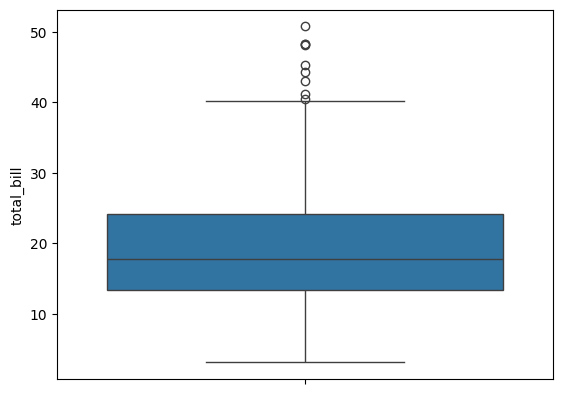

In [6]:
# total_bill의 box plot
sns.boxplot(data=tips, y='total_bill')
plt.show()

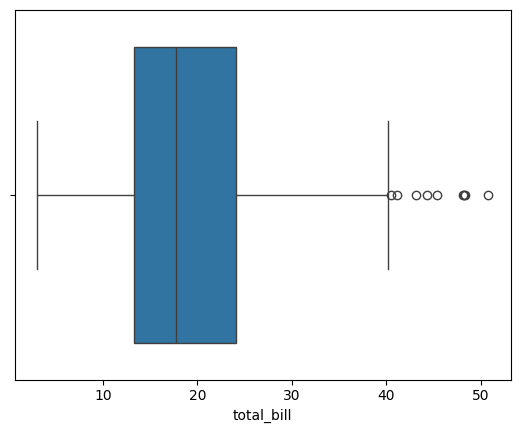

In [7]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

## 성별 팁의 box plot

In [8]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [9]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


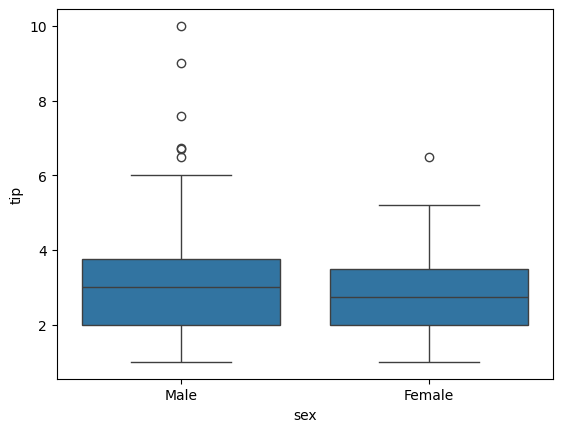

In [10]:
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

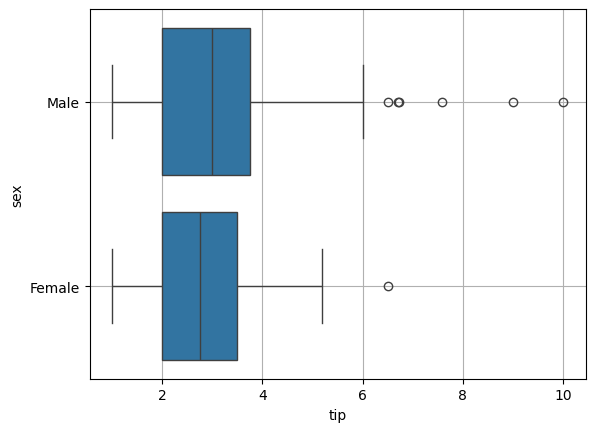

In [11]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.grid()
plt.show()

## 요일별 팁의 box plot

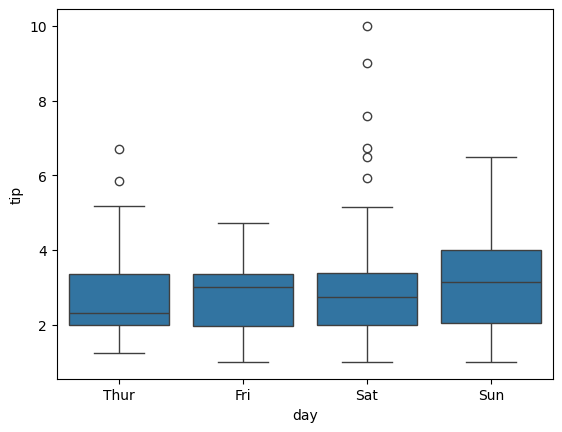

In [12]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

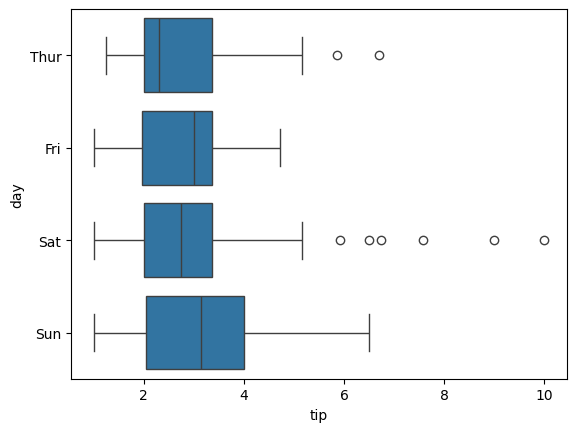

In [13]:
sns.boxplot(data=tips, x='tip', y='day')
plt.show()

## 시간별 팁의 box plot

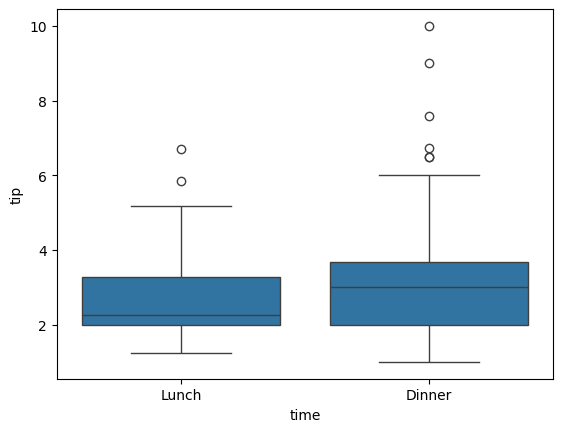

In [14]:
sns.boxplot(data=tips, x='time', y='tip')
plt.show()

## 요일별 성별 팁의 box plot

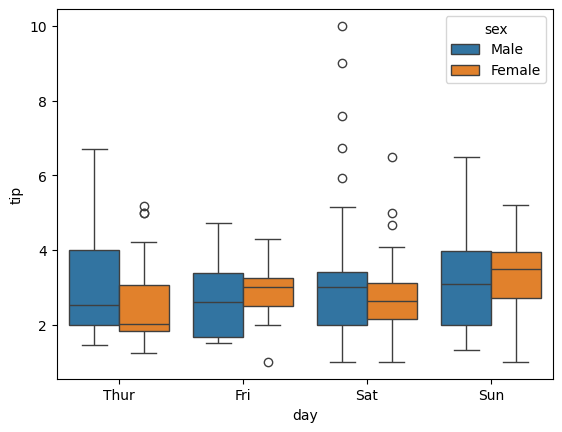

In [15]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')
plt.show()

In [16]:
# 토요일 남성 팁의 기술 통계량
tips[(tips.day == 'Sat') & (tips.sex == 'Male')].tip.describe()

,tip
count,59.000000
mean,3.083898
std,1.791360
min,1.000000
25%,2.000000
50%,3.000000
75%,3.400000
max,10.000000


In [17]:
# 토요일 여성 팁의 기술 통계량
tips[(tips.day == 'Sat') & (tips.sex == 'Female')].tip.describe()

,tip
count,28.000000
mean,2.801786
std,1.234480
min,1.000000
25%,2.150000
50%,2.625000
75%,3.102500
max,6.500000


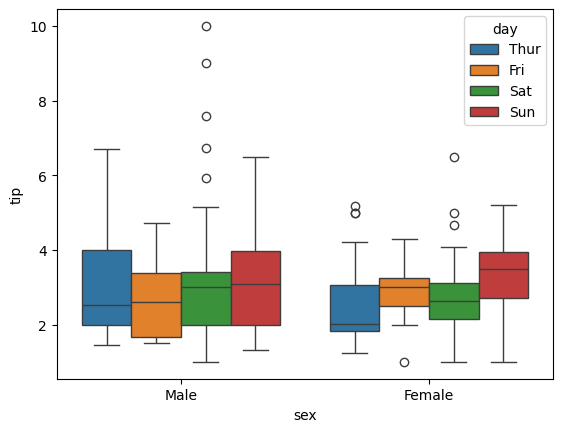

In [18]:
sns.boxplot(data=tips, x='sex', y='tip', hue='day')
plt.show()

## 요일별 흡연여부별 팁의 box plot

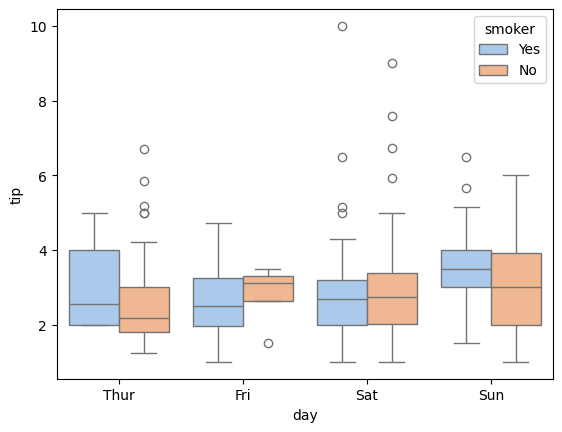

In [19]:
sns.boxplot(data=tips, x='day', y='tip', hue='smoker', palette='pastel')
plt.show()

## 2개 이상의 Axes 사용하기

Figure에 2개의 Axes를 1x2 모양(nrows=1, ncols=2)으로 생성해서, 각각의 Axes에 box plot 표시.

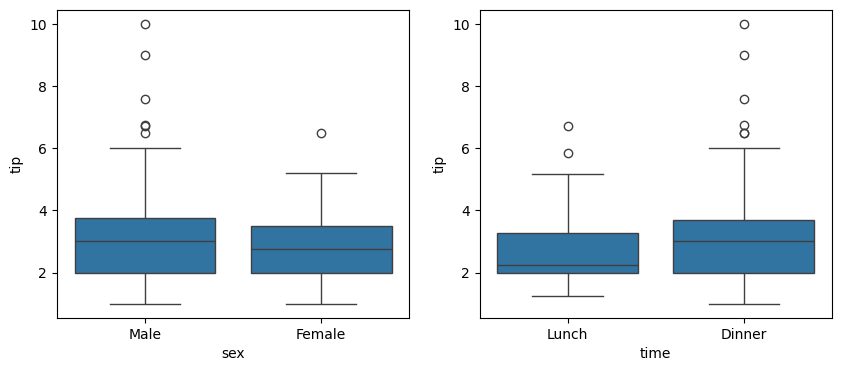

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 성별 팁의 box plot
sns.boxplot(data=tips, x='sex', y='tip', ax=axes[0])

# 시간별 팁의 box plot
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1])

plt.show()

# Histogram

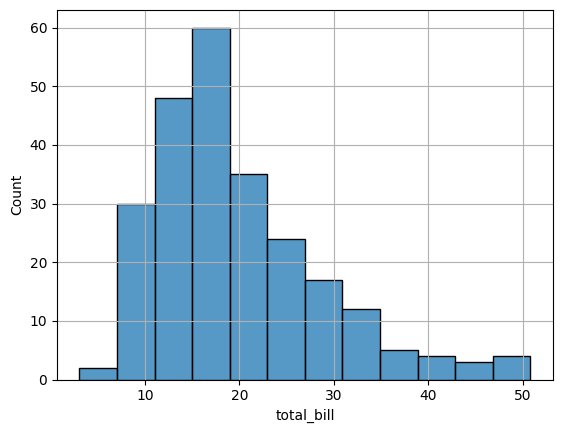

In [21]:
# 영수증 총액(total_bill) 히스토그램
sns.histplot(data=tips, x='total_bill', bins=12)
plt.grid()
plt.show()

Figure에 2x1 모양(nrows=2, ncols=1)으로 Axes 2갤를 생성하고, 위쪽에는 tip의 box plot을, 아래쪽에는 tip의 histogram을 그리세요.

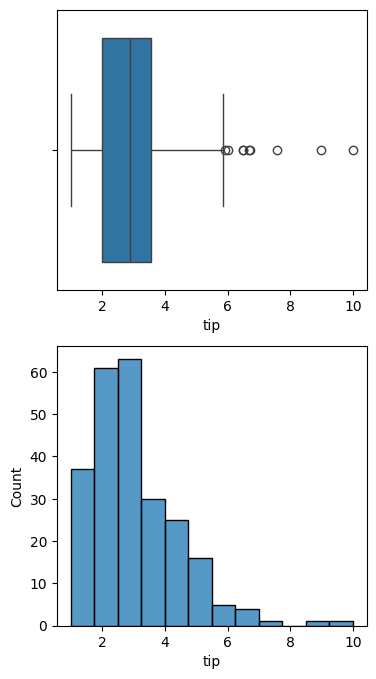

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 8))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', bins=12, ax=axes[1])

plt.show()

# 막대 그래프

## `countplot()`

카테고리(범주) 타입 변수의 빈도수를 막대로 시각화.

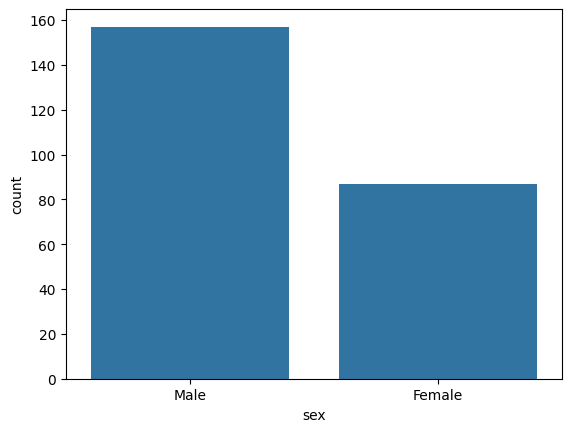

In [23]:
sns.countplot(data=tips, x='sex')
plt.show()

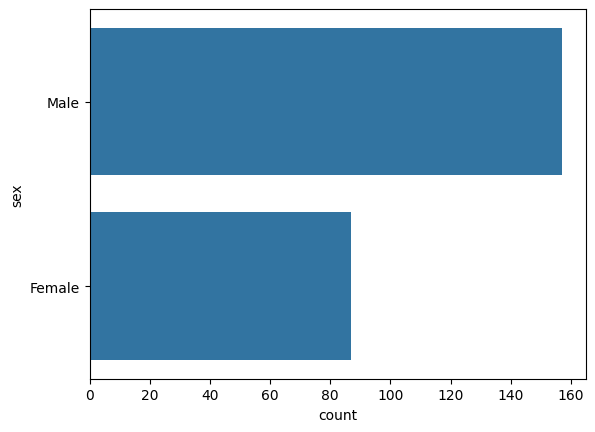

In [24]:
sns.countplot(data=tips, y='sex')
plt.show()

In [25]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


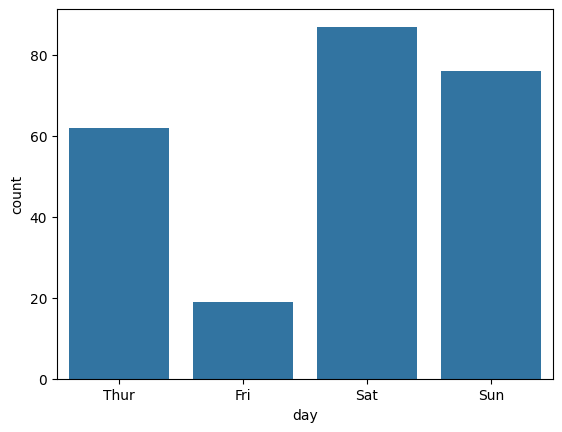

In [26]:
# 요일 빈도수 막대 그래프
sns.countplot(data=tips, x='day')
plt.show()

In [27]:
tips[tips.day == 'Thur'].day.count()

np.int64(62)

In [28]:
tips[tips.day == 'Fri'].day.count()

np.int64(19)

In [29]:
tips.day.value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


### 그룹(카테고리)별 빈도수 막대 그래프

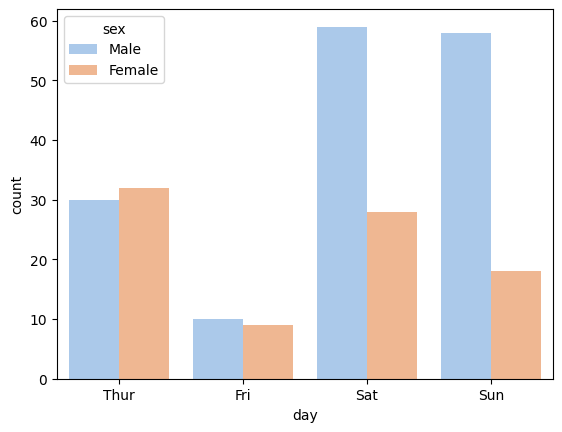

In [30]:
# 요일별 성별 빈도수 막대 그래프
sns.countplot(data=tips, x='day', hue='sex', palette='pastel')
plt.show()

In [31]:
tips[tips.day == 'Thur'].sex.value_counts()

,count
sex,
Female,32
Male,30


In [32]:
tips.groupby(by=['day', 'sex'], observed=True).sex.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

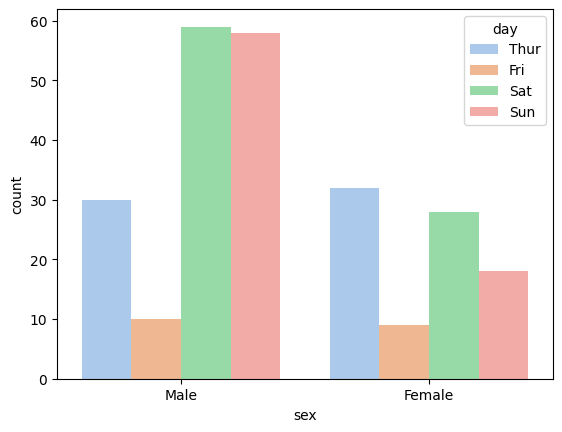

In [33]:
sns.countplot(data=tips, x='sex', hue='day', palette='pastel')
plt.show()

In [34]:
tips.groupby(by=['sex', 'day'], observed=True).day.count()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: day, dtype: int64

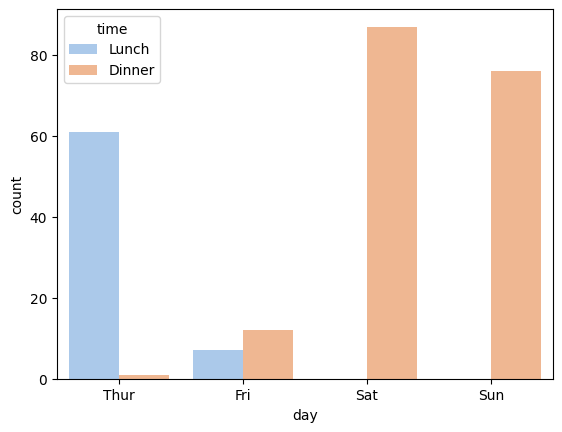

In [35]:
# 요일별 시간별 빈도수 막대 그래프
sns.countplot(data=tips, x='day', hue='time', palette='pastel')
plt.show()

In [36]:
# 요일별 시간별 빈도수
tips.groupby(by=['day', 'time'], observed=True).time.count()
#> observed 파라미터: True이면 값이 있는 자료들만 결과로 리턴,
# False이면 값이 없는 자료들도 (0으로) 리턴.

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
Name: time, dtype: int64

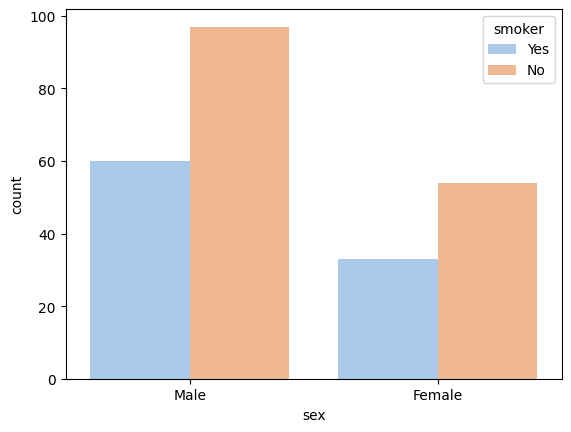

In [37]:
# 성별 흡연여부별 빈도수 막대 그래프
sns.countplot(data=tips, x='sex', hue='smoker', palette='pastel')
plt.show()

In [38]:
tips.groupby(by=['sex', 'smoker'], observed=True).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

## `barplot()`

*   그룹별 (숫자 타입) 변수의 기술 통계량(평균, 합계, 중앙값, ...)을 막대로 시각화.
*   카테고리(범주) 타입 변수와 연속형 변수를 함께 시각화.


### 성별 팁의 평균

In [39]:
tips[tips.sex == 'Male'].tip.mean()

np.float64(3.0896178343949043)

In [40]:
tips[tips.sex == 'Female'].tip.mean()

np.float64(2.8334482758620685)

In [41]:
tips.groupby(by=['sex'], observed=True).tip.mean()

,tip
sex,
Male,3.089618
Female,2.833448


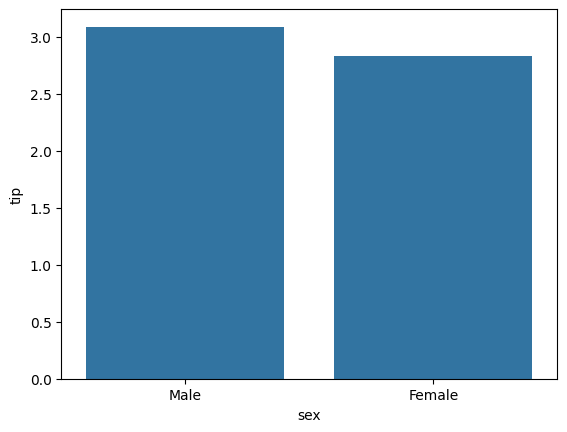

In [42]:
sns.barplot(data=tips, x='sex', y='tip', errorbar=None)
#> barplot 함수의 estimator 파라미터의 기본값이 'mean'이기 때문에 평균을 계산해줌.
plt.show()

### 성별 팁의 최댓값

In [43]:
tips.groupby(by=['sex'], observed=True).tip.max()

,tip
sex,
Male,10.0
Female,6.5


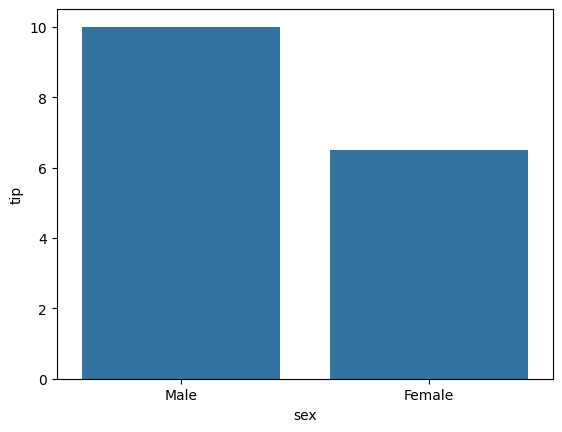

In [44]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', errorbar=None)
plt.show()

### 요일별 팁의 평균 가로 막대 그래프

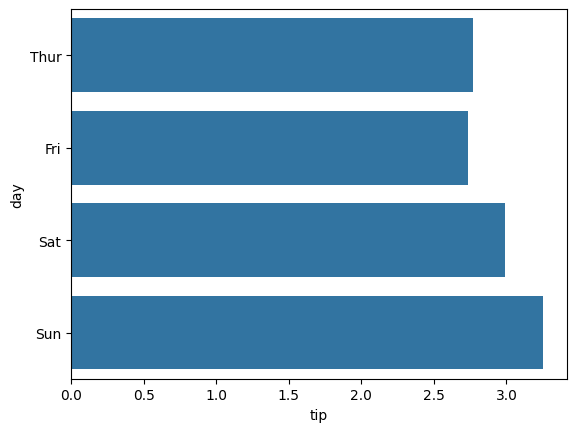

In [45]:
sns.barplot(data=tips, x='tip', y='day', errorbar=None)
plt.show()

In [46]:
tips.groupby(by=['day'], observed=True).tip.mean()

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


### 요일별 흡연여부별 팁의 평균 막대 그래프

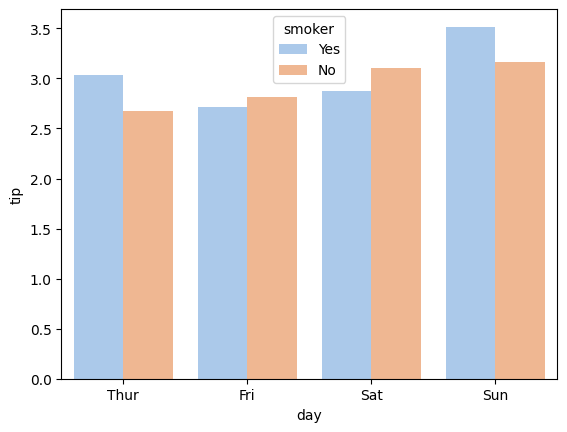

In [47]:
sns.barplot(data=tips, x='day', y='tip', hue='smoker', errorbar=None, palette='pastel')
plt.show()

In [48]:
tips.groupby(by=['day', 'smoker'], observed=True).tip.mean()

day   smoker
Thur  Yes       3.030000
      No        2.673778
Fri   Yes       2.714000
      No        2.812500
Sat   Yes       2.875476
      No        3.102889
Sun   Yes       3.516842
      No        3.167895
Name: tip, dtype: float64

# Scatter plot(산점도)

두 변수 간의 상관관계를 시각화.

## `scatterplot()`

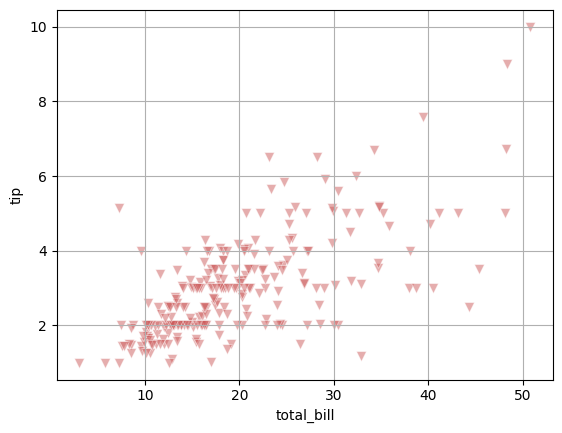

In [49]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip',
                s=50, c='IndianRed', marker='v', alpha=0.5)
#> plt.scatter() 함수의 파라미터들을 그대로 사용할 수 있음.
#> s=마커 크기. c=마커 색깔. marker=마커 종류. alpha=불투명도.
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀(linear regression) 직선.

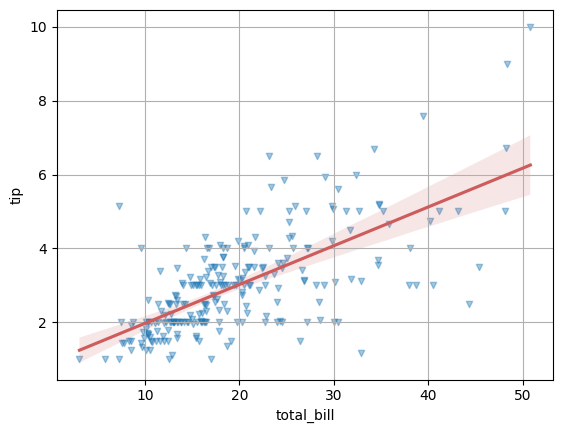

In [50]:
sns.regplot(data=tips, x='total_bill', y='tip', marker='v',
            scatter_kws={'alpha': 0.4, 's': 20},
            line_kws={'color': 'IndianRed'})
#> scatter_kws: 산점도의 설정을 변경하기 위한 dictionary.
#> line_kws: 선형 회귀 직선의 설정을 변경하기 위한 dictionary.
plt.grid()
plt.show()

## `jointplot()`

산점도 + 히스토그램

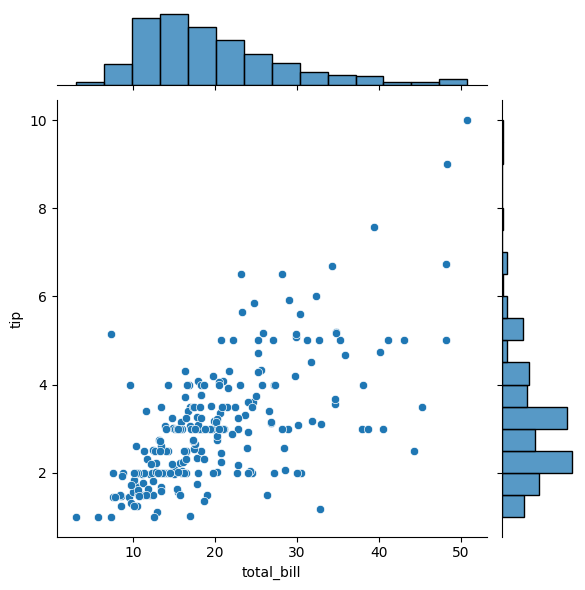

In [51]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

## Ex. 1

tip ~ total_bill 산점도. 마커의 색깔을 성별에 따라서 다르게 시각화.

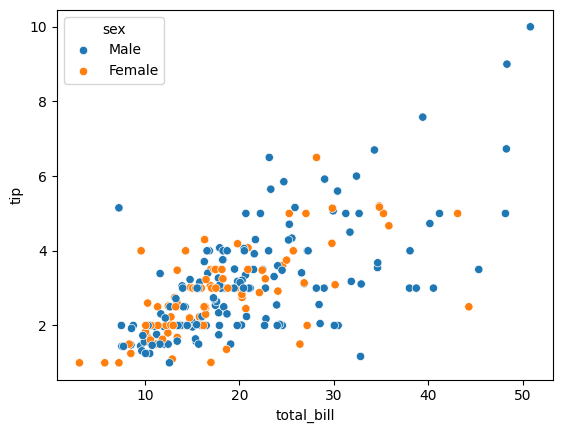

In [52]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

## Ex. 2

tip ~ total_bill 산점도. 마커 색깔은 성별 따라서 다르게, 마커의 크기를 size(인원수)에 따라서 다르게 시각화.

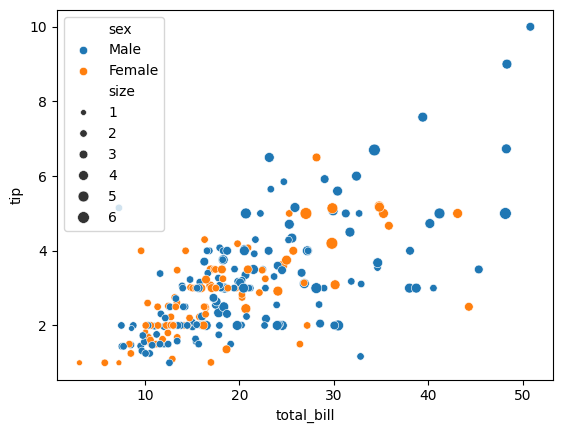

In [53]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size')
plt.show()

## Ex. 3

tip ~ total_bill 산점도. 마커 색깔은 성별에 따라서 다르게, 마커 모양은 흡연여부에 따라서 다르게 시각화.

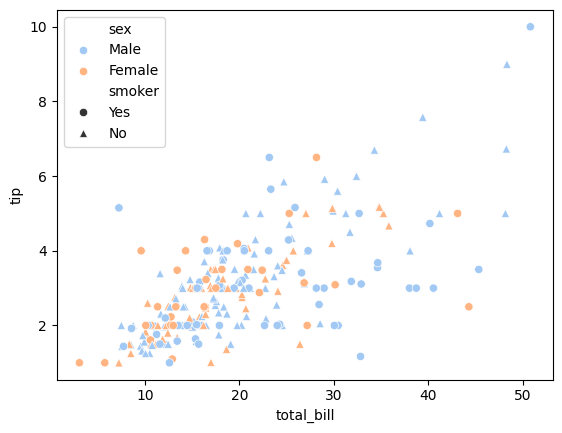

In [54]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='smoker',
                palette='pastel', markers=['o', '^'])
plt.show()

# Line plot(선 그래프)

In [55]:
np.random.seed(42)
df = pd.DataFrame(data={
    'day': np.arange(1, 31),
    'price': np.random.rand(30)
})

In [56]:
df

,day,price
0,1,0.374540
1,2,0.950714
2,3,0.731994
3,4,0.598658
4,5,0.156019
5,6,0.155995
6,7,0.058084
7,8,0.866176
8,9,0.601115
9,10,0.708073


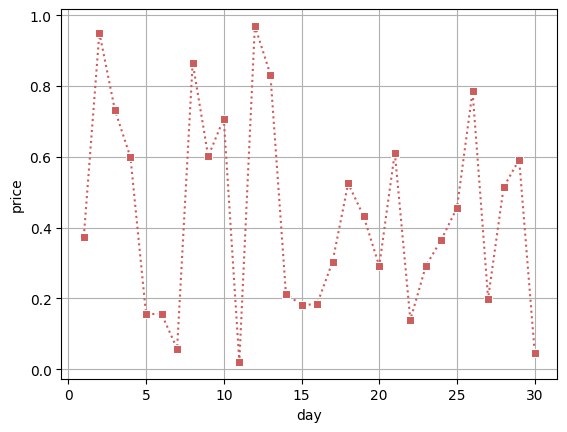

In [75]:
sns.lineplot(data=df, x='day', y='price',
             marker='s', linestyle=':', color='IndianRed')
plt.grid()
plt.show()

# Categroy plot(`catplot()`)

카테고리 별로 Axes 객체를 생성하고, 변수의 통계값을 모든 Axes에 같은 종류의 그래프로 시각화.


*   요일(x축) 별 팁(y축)의 평균 막대 그래프
*   성별(Axes 행)과 흡연여부(Axes 열)별로 Axes들을 나눔


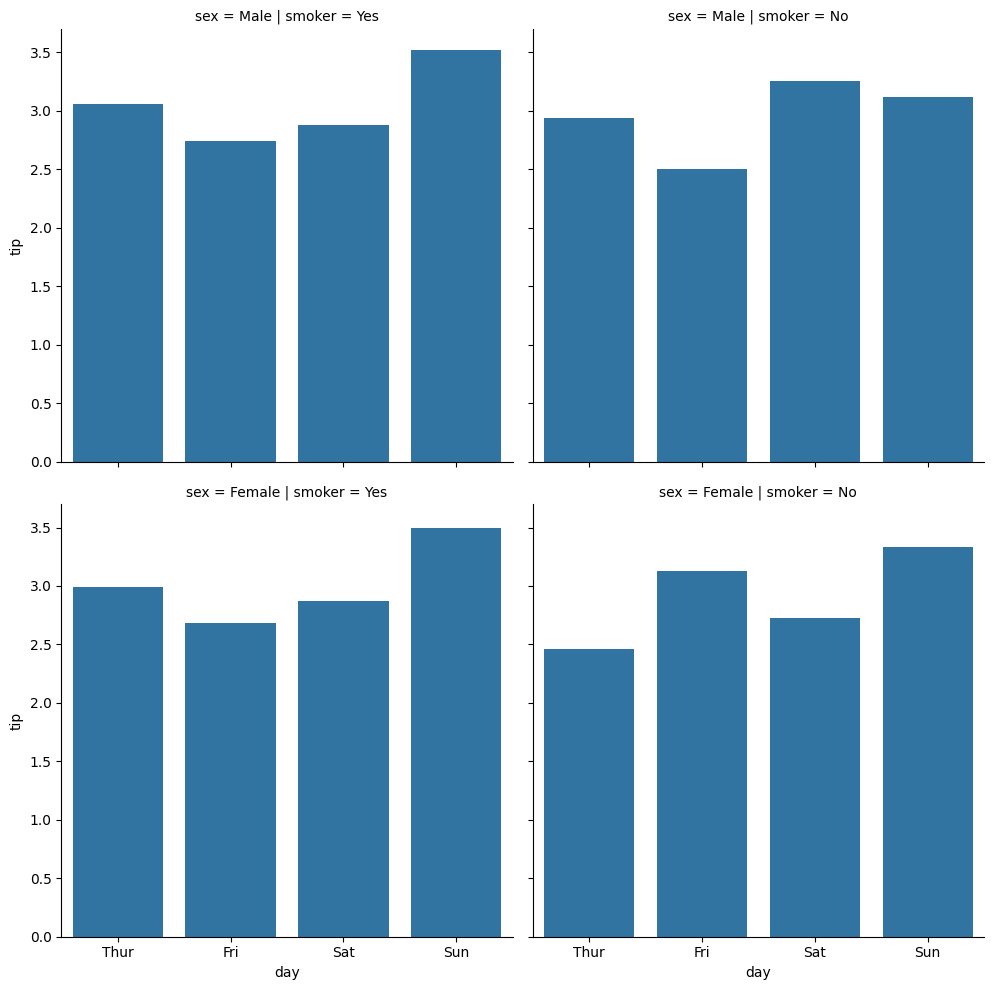

In [78]:
sns.catplot(data=tips, x='day', y='tip',
            row='sex', col='smoker', kind='bar', errorbar=None)
#> estimator 파라미터의 기본값은 'mean'.
plt.show()

In [80]:
tips.groupby(by=['sex', 'smoker', 'day'], observed=True).tip.mean()

sex     smoker  day 
Male    Yes     Thur    3.058000
                Fri     2.741250
                Sat     2.879259
                Sun     3.521333
        No      Thur    2.941500
                Fri     2.500000
                Sat     3.256563
                Sun     3.115349
Female  Yes     Thur    2.990000
                Fri     2.682857
                Sat     2.868667
                Sun     3.500000
        No      Thur    2.459600
                Fri     3.125000
                Sat     2.724615
                Sun     3.329286
Name: tip, dtype: float64

## Ex. 1

*   흡연여부(Axes 행), 시간(Axes 열)으로 Axes들을 나눠서, 요일별 팁의 막대 그래프.
*   groupby 메서드와 통계 함수를 사용해서 값 계산.

In [85]:
tips.groupby(by=['smoker', 'time', 'day'], observed=False).tip.mean()

smoker  time    day 
Yes     Lunch   Thur    3.030000
                Fri     2.280000
                Sat          NaN
                Sun          NaN
        Dinner  Thur         NaN
                Fri     3.003333
                Sat     2.875476
                Sun     3.516842
No      Lunch   Thur    2.666364
                Fri     3.000000
                Sat          NaN
                Sun          NaN
        Dinner  Thur    3.000000
                Fri     2.750000
                Sat     3.102889
                Sun     3.167895
Name: tip, dtype: float64

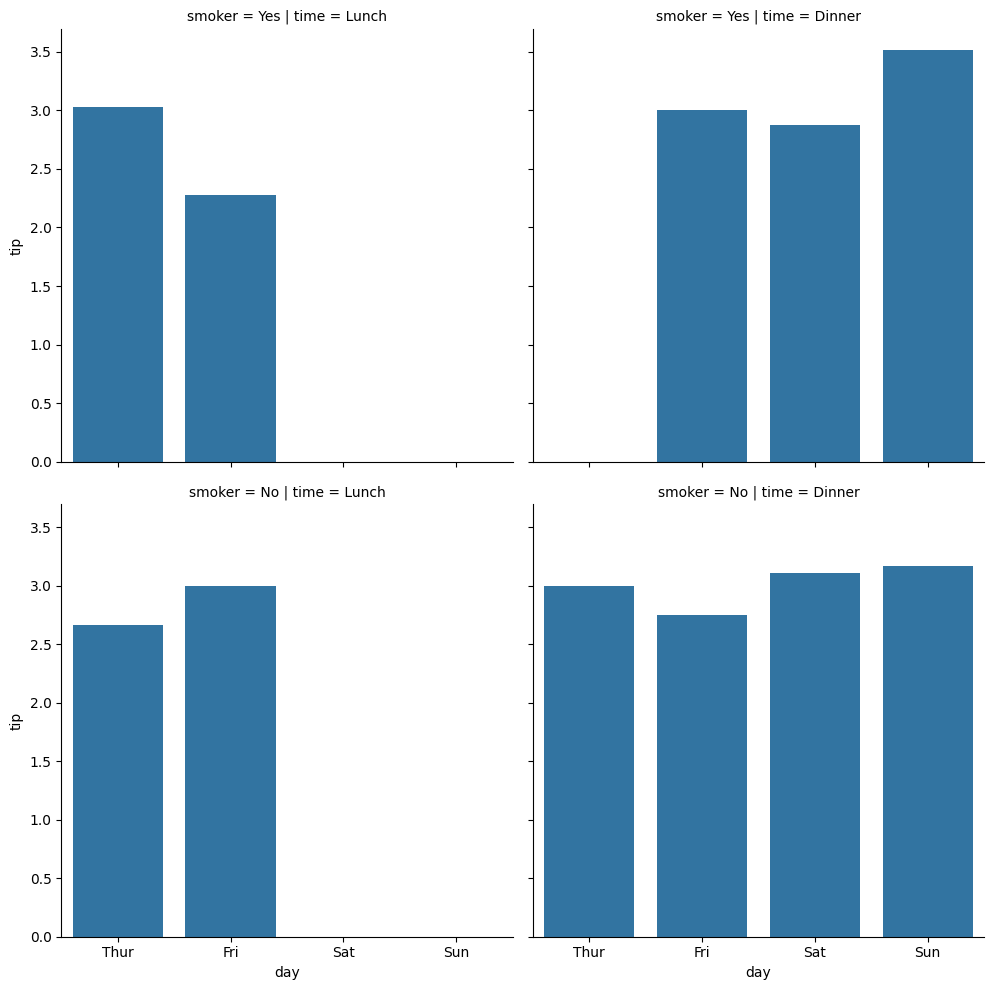

In [88]:
sns.catplot(data=tips, x='day', y='tip', kind='bar',
            row='smoker', col='time', errorbar=None)
plt.show()

## Ex. 2

*   흡연여부(Axes 행), 시간(Axes 열)으로 Axes를 나눠서, 요일(x축)별 성별(색깔) 팁(y축)의 평균 막대 그래프.
*   groupby를 사용한 값 계산


In [90]:
tips.groupby(by=['smoker', 'time', 'day', 'sex'], observed=True).tip.mean()

smoker  time    day   sex   
Yes     Lunch   Thur  Male      3.058000
                      Female    2.990000
                Fri   Male      1.900000
                      Female    2.660000
        Dinner  Fri   Male      3.246000
                      Female    2.700000
                Sat   Male      2.879259
                      Female    2.868667
                Sun   Male      3.521333
                      Female    3.500000
No      Lunch   Thur  Male      2.941500
                      Female    2.437083
                Fri   Female    3.000000
        Dinner  Thur  Female    3.000000
                Fri   Male      2.500000
                      Female    3.250000
                Sat   Male      3.256563
                      Female    2.724615
                Sun   Male      3.115349
                      Female    3.329286
Name: tip, dtype: float64

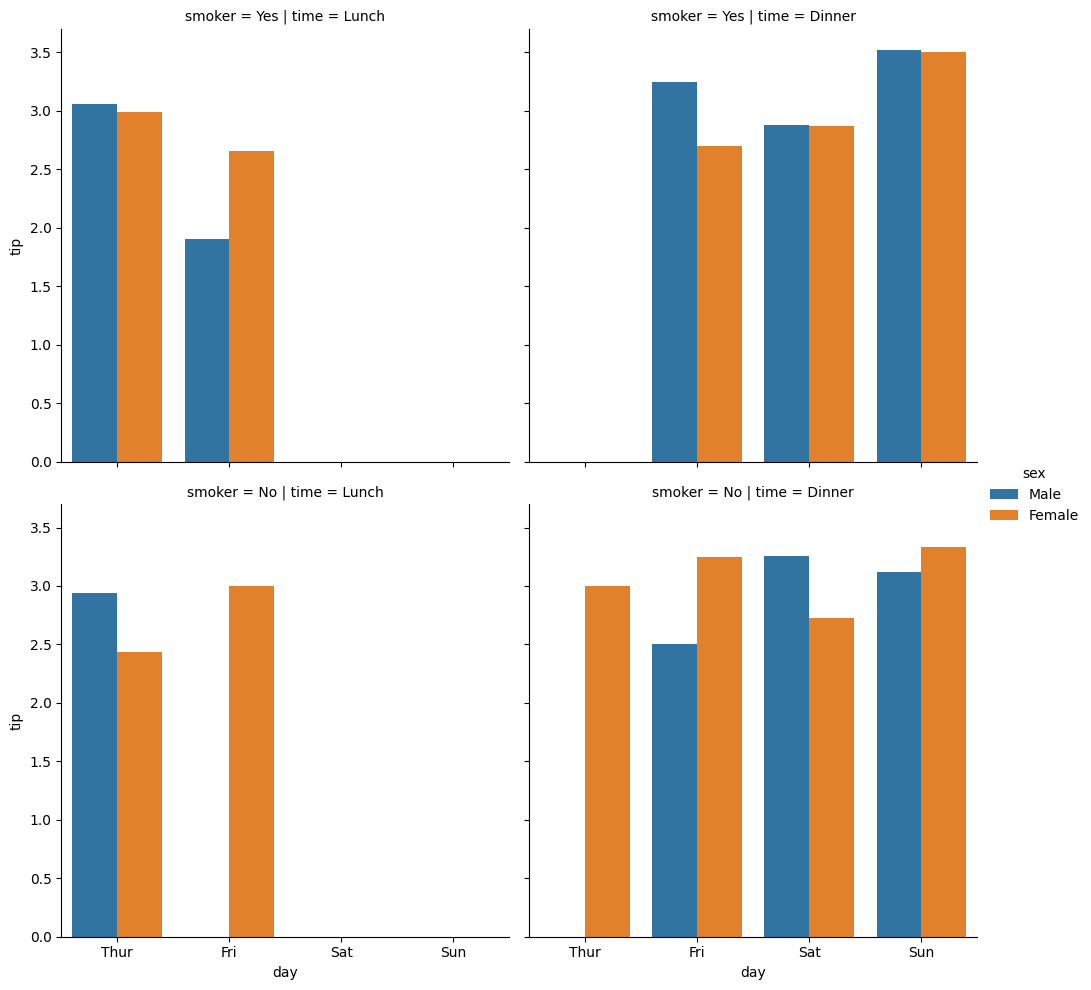

In [95]:
sns.catplot(data=tips, x='day', y='tip', hue='sex', kind='bar',
            row='smoker', col='time', errorbar=None)
plt.show()

## Ex. 3

*   흡연여부(Axes 행)와 시간(Axes 열)으로 Axes를 나눠서, 요일별 팁의 box plot.
*   groupby, describe 메서드를 사용해서 기술 통계량을 출력.

In [92]:
tips.groupby(by=['smoker', 'time', 'day'], observed=True).tip.describe()

count      mean       std   min     25%    50%     75%  \
smoker time   day                                                            
Yes    Lunch  Thur   17.0  3.030000  1.113491  2.00  2.0000  2.560  4.0000   
              Fri     6.0  2.280000  0.662239  1.58  1.9400  2.100  2.4250   
       Dinner Fri     9.0  3.003333  1.234038  1.00  2.5000  3.000  4.0000   
              Sat    42.0  2.875476  1.630580  1.00  2.0000  2.690  3.1975   
              Sun    19.0  3.516842  1.261151  1.50  3.0000  3.500  4.0000   
No     Lunch  Thur   44.0  2.666364  1.296821  1.25  1.7825  2.105  3.0625   
              Fri     1.0  3.000000       NaN  3.00  3.0000  3.000  3.0000   
       Dinner Thur    1.0  3.000000       NaN  3.00  3.0000  3.000  3.0000   
              Fri     3.0  2.750000  1.089725  1.50  2.3750  3.250  3.3750   
              Sat    45.0  3.102889  1.642088  1.00  2.0100  2.750  3.3900   
              Sun    57.0  3.167895  1.224785  1.01  2.0000  3.020  3.9200   

                      max  
smoker time   day          
Yes    Lunch  Thur   5.00  
              Fri    3.48  
       Dinner Fri    4.73  
              Sat   10.00  
              Sun    6.50  
No     Lunch  Thur   6.70  
              Fri    3.00  
       Dinner Thur   3.00  
              Fri    3.50  
              Sat    9.00  
              Sun    6.00

[[<Axes: title={'center': 'smoker = Yes | time = Lunch'}, ylabel='tip'>
  <Axes: title={'center': 'smoker = Yes | time = Dinner'}>]
 [<Axes: title={'center': 'smoker = No | time = Lunch'}, xlabel='day', ylabel='tip'>
  <Axes: title={'center': 'smoker = No | time = Dinner'}, xlabel='day'>]]


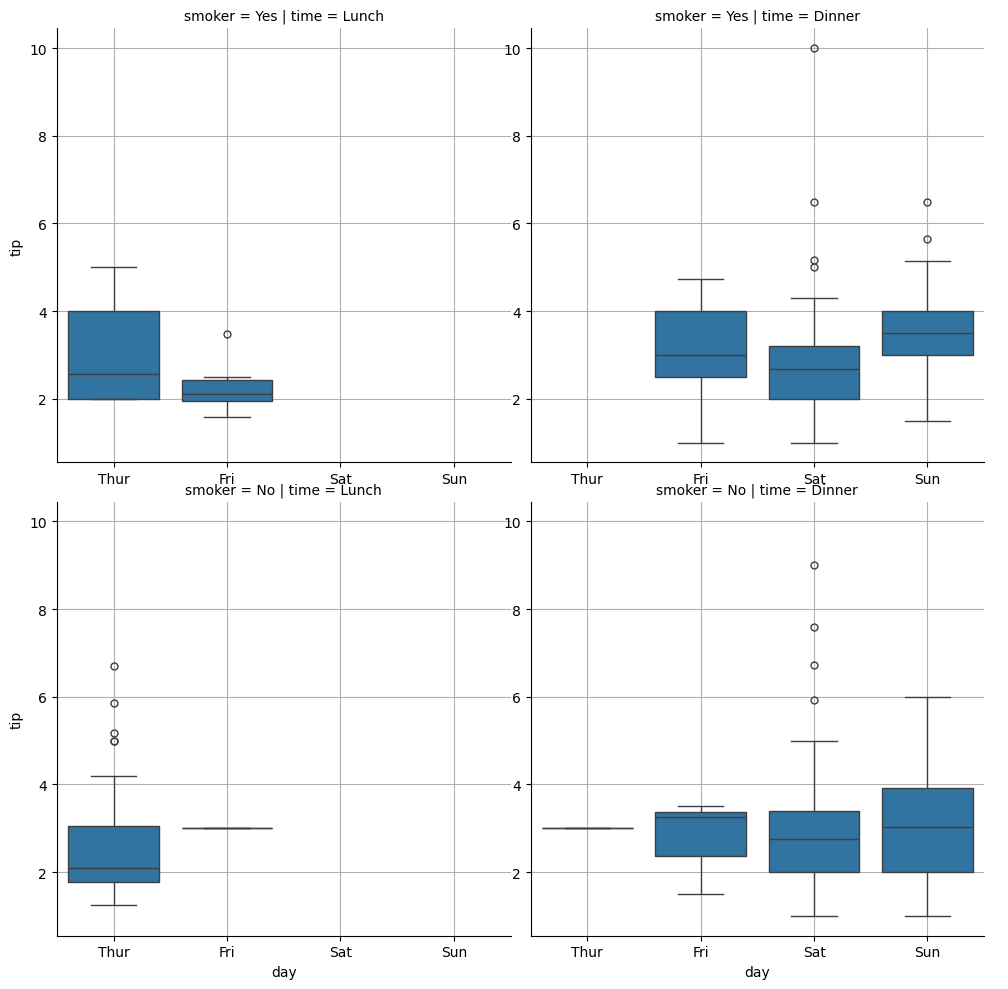

In [112]:
g = sns.catplot(data=tips, x='day', y='tip', kind='box',
            row='smoker', col='time')

print(g.axes)  #> Axes들을 갖는 2차원 배열.
for row in g.axes:
    for a in row:
        a.grid()

# 모든 Axes의 레이블 표시.
g.tick_params(axis='x', labelbottom=True)
g.tick_params(axis='y', labelleft=True)

plt.show()

# Interactive Graph

*  plotly 라이브러리


In [113]:
import plotly.express as px

## Box plot

In [115]:
figure = px.box(data_frame=tips, x='sex', y='tip', color='sex')
figure.show()

In [116]:
# 요일별 흡연여부별 팁의 box plot
figure = px.box(data_frame=tips, x='day', y='tip', color='smoker')
figure.show()

## Scatter plot

In [119]:
# tip ~ total_bill
figure = px.scatter(data_frame=tips, x='total_bill', y='tip')
figure.show()

In [121]:
# tip ~ total_bill 산점도.
# 성별로 색깔을 다르게, 요일별로 마커 모양을 다르게, 인원수별로 마커 크기를 다르게 표현
figure = px.scatter(data_frame=tips, x='total_bill', y='tip',
                    color='sex', symbol='day', size='size')
figure.show()

## Histogram

In [128]:
figure = px.histogram(data_frame=tips, x='total_bill', nbins=10,
                      template='simple_white')
figure.show()

## Facetting

Figure 안에 행과 열을 구분해서 Axes들을 여러개 생성하고 그래프를 시각화.

In [130]:
# 흡연여부와 시간으로 Axes를 나눠서 tip ~ total_bill 산점도.
figure = px.scatter(data_frame=tips, x='total_bill', y='tip', color='sex',
                    facet_row='smoker', facet_col='time')
figure.show()

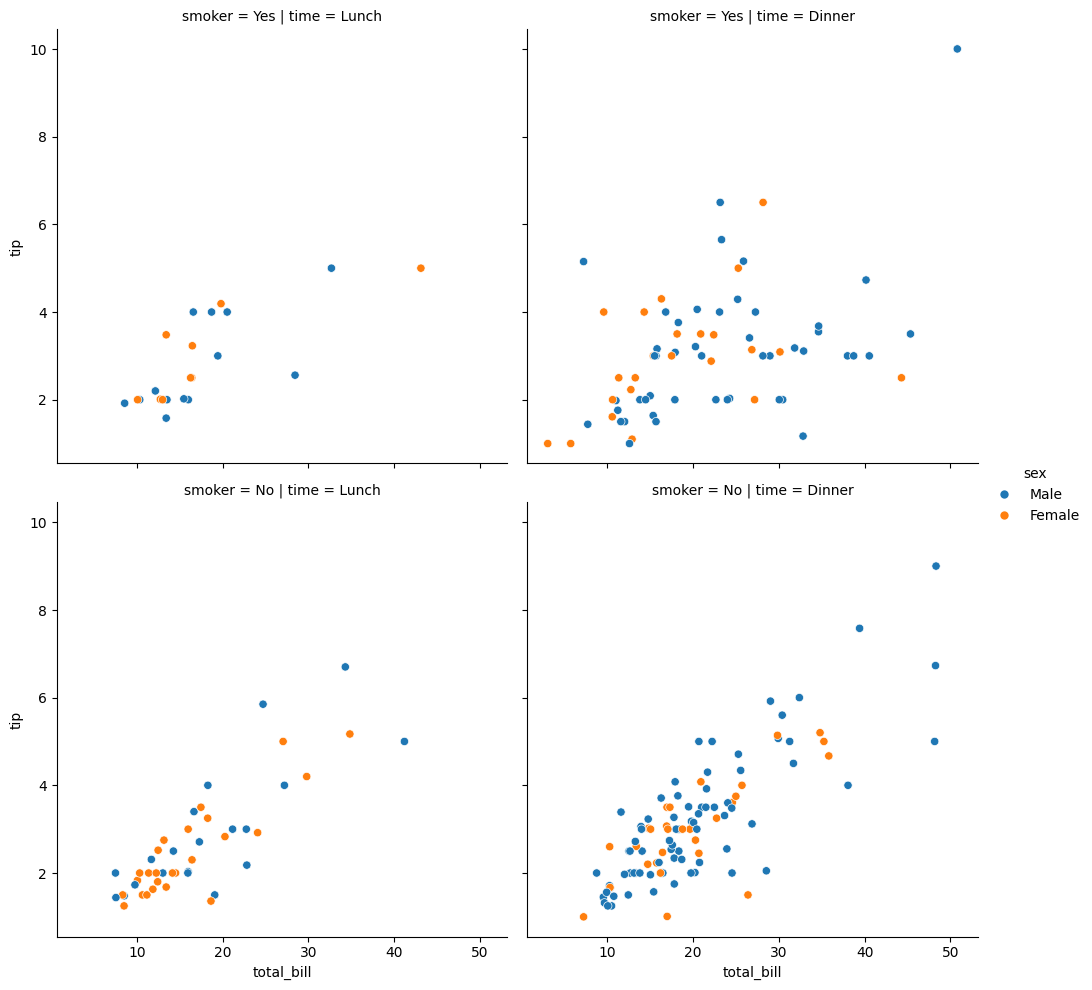

In [134]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex',
            row='smoker', col='time')
plt.show()

In [135]:
figure = px.box(data_frame=tips, x='day', y='tip',
                facet_row='smoker', facet_col='time')
figure.show()